# Bottom Temperature for SOE
https://noaa-edab.github.io/catalog/bottom_temp_comp.html

In [1]:
# import relevant packages
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import regionmask
import READ_EDAB_Utilities_py as reupy
import copernicusmarine
import numpy as np

In [ ]:
# Load in the mom6 data
#url = "http://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/northwest_atlantic/hist_run/regrid/ocean_monthly.199301-201912.tob.nc"
#mom6_bt = xr.open_dataset(url)

In [2]:
# Load mom6 data
#mom6_bt = xr.open_dataset('ocean_monthly.199301-201912.tob.nc')
mom6_bt_cropped = xr.open_dataset('mom6_bt_cropped.nc')

In [ ]:
#mom6_bt

In [ ]:
#mom6_bt_cropped = mom6_bt.sel(lat = slice(30,48), lon = slice(260, 300))

In [ ]:
#mom6_bt_cropped.to_netcdf('mom6_bt_cropped.nc')

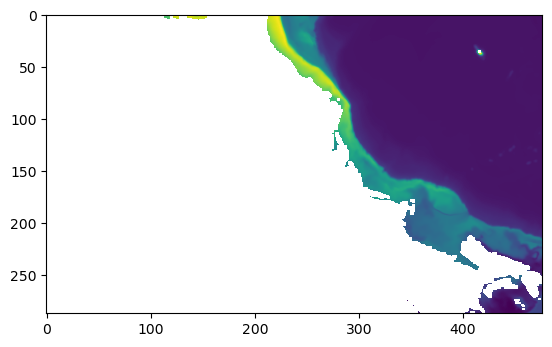

In [3]:
# Take a look at the data
plt.imshow(mom6_bt_cropped.tob[10,:,:])

In [4]:
# Load in the shapefile
epu = gpd.read_file('EPU_shape/EPU_NOESTUARIES.shp')

In [5]:
mab = epu[epu.EPU == 'MAB']
gom = epu[epu.EPU == 'GOM']
ss = epu[epu.EPU == 'SS']
gb = epu[epu.EPU == 'GB']

In [6]:
mab_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', mab)
gom_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', gom)
ss_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', ss)
gb_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', gb)

In [7]:
help(reupy.crop_nd)

Help on function crop_nd in module READ_EDAB_Utilities_py.crop_nd:

crop_nd(data, longitude_name, latitude_name, shape)



In [8]:
#glorys_bt = copernicusmarine.open_dataset(dataset_id="cmems_mod_glo_phy_my_0.083deg_P1M-m")
#glorys_bt

In [9]:
#glorys_bt_cropped = glorys_bt.bottomT.sel(latitude = slice(30,48), longitude = slice(-80, -60))

In [10]:
#Load the glorys data
glorys_bt_cropped = xr.open_dataset('glorys_bt_cropped.nc')

In [11]:
glorys_bt_cropped

<xarray.Dataset>
Dimensions:    (latitude: 217, longitude: 241, time: 342)
Coordinates:
  * latitude   (latitude) float32 30.0 30.08 30.17 30.25 ... 47.83 47.92 48.0
  * longitude  (longitude) float32 -80.0 -79.92 -79.83 ... -60.17 -60.08 -60.0
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2021-06-01
Data variables:
    bottomT    (time, latitude, longitude) float32 ...

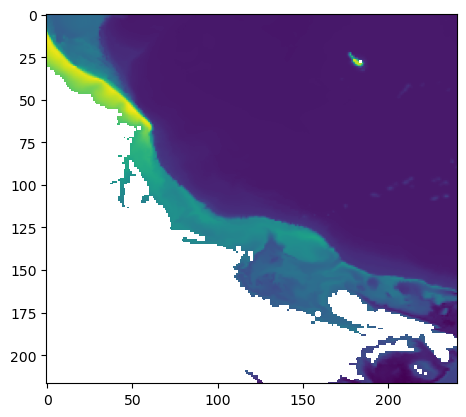

In [12]:
# Take a look at the data
plt.imshow(glorys_bt_cropped.bottomT[10,:,:])

In [ ]:
#glorys_bt_cropped.to_netcdf('glorys_bt_cropped')

In [13]:
mab_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', mab)
gom_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', gom)
ss_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', ss)
gb_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', gb)

In [14]:
mab_gl_anom = mab_gl.mean(['latitude','longitude']).groupby('time.season') - mab_gl.mean(['latitude','longitude']).groupby('time.season').mean('time')

In [15]:
mab_gl_anom = mab_gl.mean(['latitude','longitude']).groupby('time.year').mean()
mab_m6_anom = mab_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

gb_gl_anom = gb_gl.mean(['latitude','longitude']).groupby('time.year').mean()
gb_m6_anom = gb_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

ss_gl_anom = ss_gl.mean(['latitude','longitude']).groupby('time.year').mean()
ss_m6_anom = ss_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

gom_gl_anom = gom_gl.mean(['latitude','longitude']).groupby('time.year').mean()
gom_m6_anom = gom_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

Text(0.5, 1.0, 'SS')

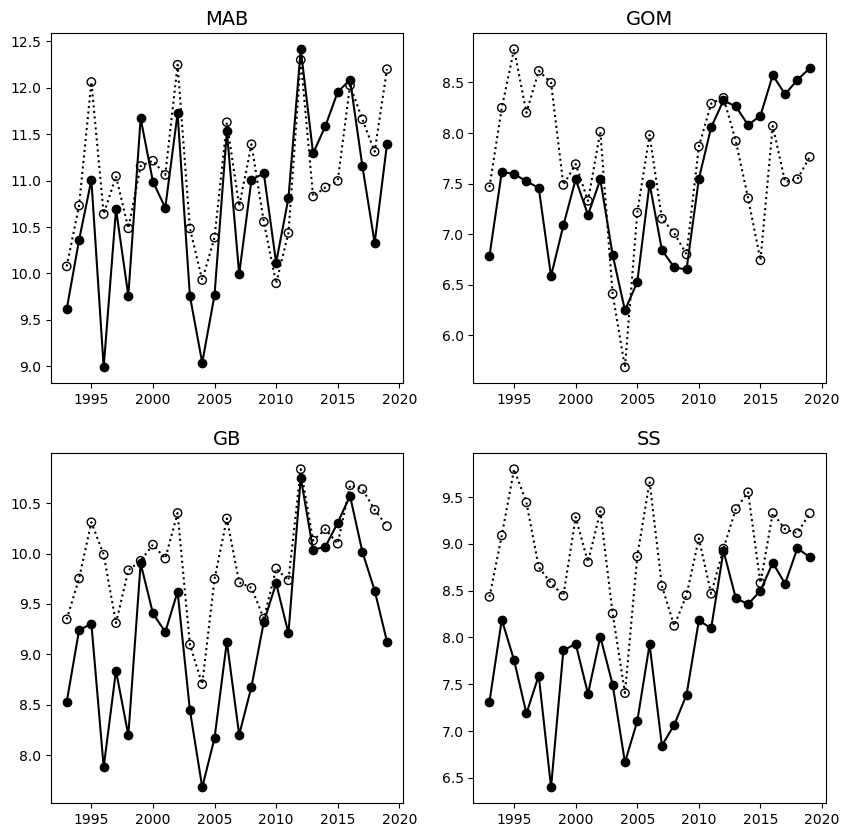

In [16]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1993, 2020), mab_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')
ax[0,0].scatter(np.arange(1993, 2020), mab_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')

ax[0,0].plot(np.arange(1993, 2020), mab_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[0,0].scatter(np.arange(1993, 2020), mab_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[0,0].set_title('MAB', fontsize = 14)


ax[0,1].plot(np.arange(1993, 2020), gom_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')
ax[0,1].scatter(np.arange(1993, 2020), gom_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')

ax[0,1].plot(np.arange(1993, 2020), gom_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), gom_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[0,1].set_title('GOM', fontsize = 14)


ax[1,0].plot(np.arange(1993, 2020), gb_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')
ax[1,0].scatter(np.arange(1993, 2020), gb_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')

ax[1,0].plot(np.arange(1993, 2020), gb_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), gb_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[1,0].set_title('GB', fontsize = 14)


ax[1,1].plot(np.arange(1993, 2020), ss_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')
ax[1,1].scatter(np.arange(1993, 2020), ss_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')

ax[1,1].plot(np.arange(1993, 2020), ss_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), ss_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[1,1].set_title('SS', fontsize = 14)

In [17]:
seasonal_avgs_mab_m6 = mab_m6.mean(['lat','lon']).resample(time = 'QE-JAN').mean()
seasonal_avgs_mab_gl = mab_gl.mean(['latitude','longitude']).resample(time = 'QE-JAN').mean()

In [18]:
seasonal_avgs_gb_m6 = gb_m6.mean(['lat','lon']).resample(time = 'QE-JAN').mean()
seasonal_avgs_gb_gl = gb_gl.mean(['latitude','longitude']).resample(time = 'QE-JAN').mean()

In [19]:
winters_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(0,109, 4)]
springs_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(1,109, 4)]
summers_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(2,109, 4)]
autumns_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(3,109, 4)]

winters_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(0,109, 4)]
springs_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(1,109, 4)]
summers_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(2,109, 4)]
autumns_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(3,109, 4)]

In [20]:
winters_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(0,109, 4)]
springs_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(1,109, 4)]
summers_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(2,109, 4)]
autumns_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(3,109, 4)]

winters_gb_gl = seasonal_avgs_gb_gl.bottomT[np.arange(0,109, 4)]
springs_gb_gl = seasonal_avgs_gb_gl.bottomT[np.arange(1,109, 4)]
summers_gb_gl = seasonal_avgs_gb_gl.bottomT[np.arange(2,109, 4)]
autumns_gb_gl = seasonal_avgs_gb_gl.bottomT[np.arange(3,109, 4)]

In [21]:
winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:])

<xarray.DataArray 'bottomT' (time: 27)>
array([-0.6634903 ,  0.20156384, -1.0480757 , -1.589386  , -0.79097843,
       -0.62033844,  0.9815035 , -1.2179174 ,  1.0517273 , -0.3554001 ,
       -0.6188326 , -0.83933353, -0.15401077,  0.85919285, -1.165947  ,
        0.02684784,  0.4560318 , -1.1740961 ,  1.045681  ,  0.20071316,
        0.47890377,  0.8152771 ,  2.0138044 ,  0.65385914,  0.6353617 ,
       -0.28079128,  1.0981512 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1994-01-31 1995-01-31 ... 2020-01-31

<>:62: SyntaxWarning: invalid escape sequence '\c'
<>:62: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_29604\3107284188.py:62: SyntaxWarning: invalid escape sequence '\c'
  ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)


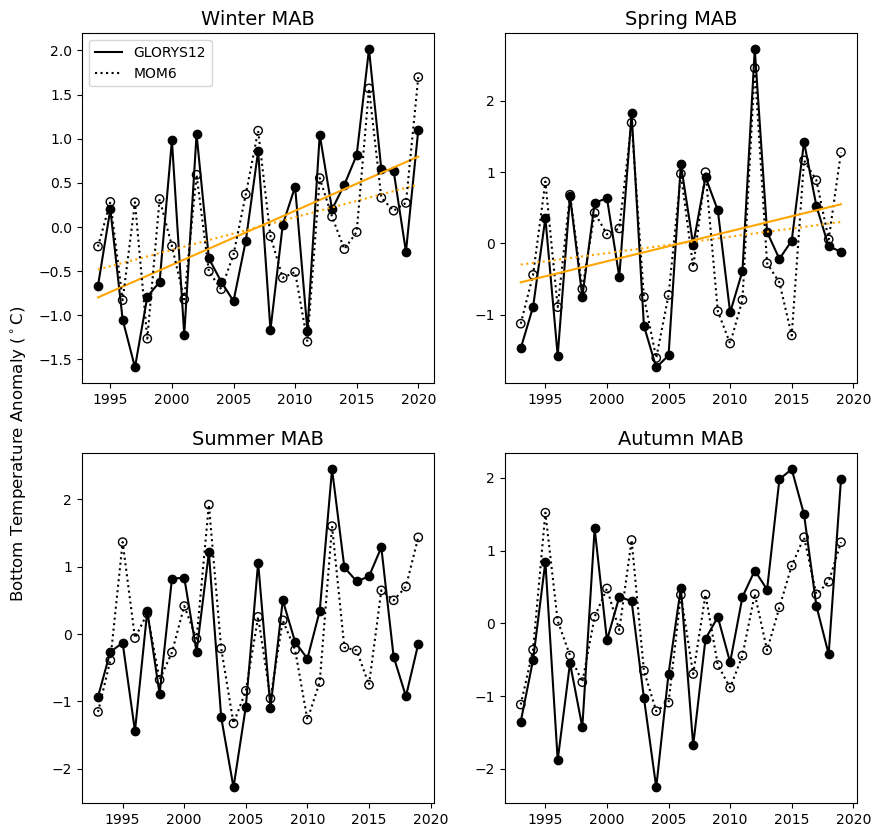

In [22]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1994, 2021), winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:]), c = 'k', label = 'GLORYS12')
ax[0,0].scatter(np.arange(1994, 2021), winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:]), c = 'k')
x1 = np.arange(1994, 2021)
y1 = winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:])
y2 = winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:])

z1 = np.polyfit(x1, y1, 1)
z2 = np.polyfit(x1, y2, 1)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)

#add trendline to plot
ax[0,0].plot(x1, p1(x1), c = 'orange')
ax[0,0].plot(x1, p2(x1), c = 'orange', linestyle = ':')

ax[0,0].plot(np.arange(1994, 2021), winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:]), c = 'k', linestyle = ':', label = 'MOM6')
ax[0,0].scatter(np.arange(1994, 2021), winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:]),facecolor = 'none', edgecolor = 'k')

ax[0,0].set_title('Winter MAB', fontsize = 14)


ax[0,1].plot(np.arange(1993, 2020), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')
ax[0,1].scatter(np.arange(1993, 2020), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')

ax[0,1].plot(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6),facecolor = 'none', edgecolor = 'k')
x2 = np.arange(1993, 2020)
y1a = springs_mab_gl - np.nanmean(springs_mab_gl)
y2a = springs_mab_m6 - np.nanmean(springs_mab_m6)

z1a = np.polyfit(x2, y1a, 1)
z2a = np.polyfit(x2, y2a, 1)
p1a = np.poly1d(z1a)
p2a = np.poly1d(z2a)

#add trendline to plot
ax[0,1].plot(x2, p1a(x2), c = 'orange')
ax[0,1].plot(x2, p2a(x2), c = 'orange', linestyle = ':')

ax[0,1].set_title('Spring MAB', fontsize = 14)


ax[1,0].plot(np.arange(1993, 2020), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')
ax[1,0].scatter(np.arange(1993, 2020), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')

ax[1,0].plot(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6),facecolor = 'none', edgecolor = 'k')

ax[1,0].set_title('Summer MAB', fontsize = 14)


ax[1,1].plot(np.arange(1993, 2020), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].scatter(np.arange(1993, 2020), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].plot(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6),facecolor = 'none', edgecolor = 'k')

ax[1,1].set_title('Autumn MAB', fontsize = 14)

ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)
ax[0,0].yaxis.set_label_coords(-0.15,-0.2)

Text(0.5, 1.0, 'Autumn GB')

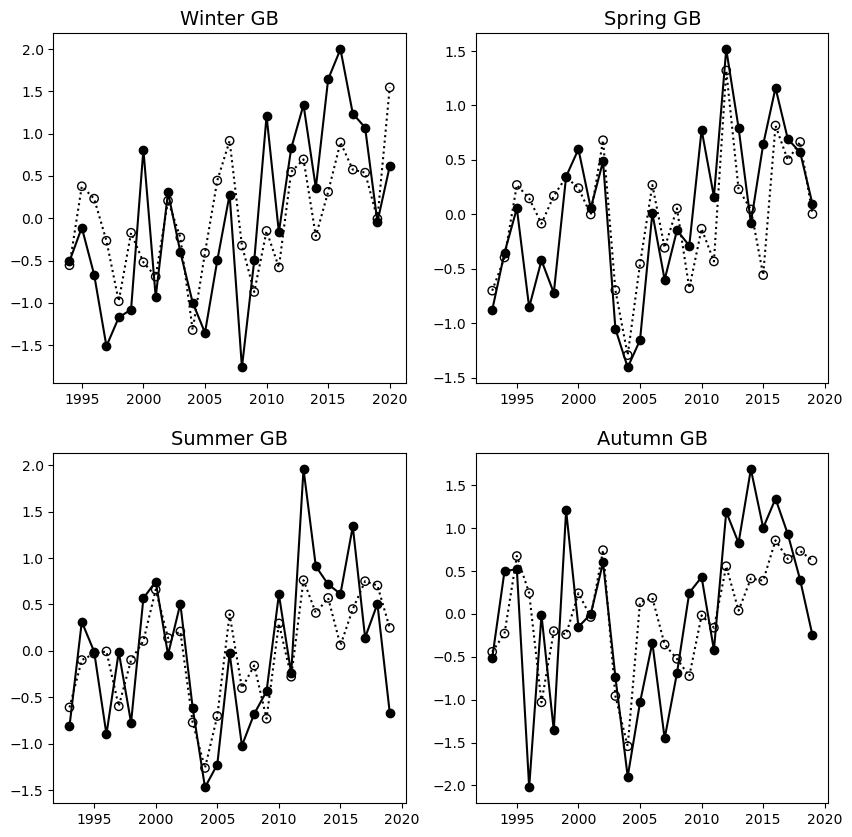

In [23]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1994, 2021), winters_gb_gl[1:] - np.nanmean(winters_gb_gl[1:]), c = 'k')
ax[0,0].scatter(np.arange(1994, 2021), winters_gb_gl[1:] - np.nanmean(winters_gb_gl[1:]), c = 'k')

ax[0,0].plot(np.arange(1994, 2021), winters_gb_m6[1:] - np.nanmean(winters_gb_m6[1:]), c = 'k', linestyle = ':')
ax[0,0].scatter(np.arange(1994, 2021), winters_gb_m6[1:] - np.nanmean(winters_gb_m6[1:]),facecolor = 'none', edgecolor = 'k')

ax[0,0].set_title('Winter GB', fontsize = 14)


ax[0,1].plot(np.arange(1993, 2020), springs_gb_gl - np.nanmean(springs_gb_gl), c = 'k')
ax[0,1].scatter(np.arange(1993, 2020), springs_gb_gl - np.nanmean(springs_gb_gl), c = 'k')

ax[0,1].plot(np.arange(1993, 2020), springs_gb_m6 - np.nanmean(springs_gb_m6), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), springs_gb_m6 - np.nanmean(springs_gb_m6),facecolor = 'none', edgecolor = 'k')

ax[0,1].set_title('Spring GB', fontsize = 14)


ax[1,0].plot(np.arange(1993, 2020), summers_gb_gl - np.nanmean(summers_gb_gl), c = 'k')
ax[1,0].scatter(np.arange(1993, 2020), summers_gb_gl - np.nanmean(summers_gb_gl), c = 'k')

ax[1,0].plot(np.arange(1993, 2020), summers_gb_m6 - np.nanmean(summers_gb_m6), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), summers_gb_m6 - np.nanmean(summers_gb_m6),facecolor = 'none', edgecolor = 'k')

ax[1,0].set_title('Summer GB', fontsize = 14)


ax[1,1].plot(np.arange(1993, 2020), autumns_gb_gl - np.nanmean(autumns_gb_gl), c = 'k')
ax[1,1].scatter(np.arange(1993, 2020), autumns_gb_gl - np.nanmean(autumns_gb_gl), c = 'k')
ax[1,1].plot(np.arange(1993, 2020), autumns_gb_m6 - np.nanmean(autumns_gb_m6), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), autumns_gb_m6 - np.nanmean(autumns_gb_m6),facecolor = 'none', edgecolor = 'k')

ax[1,1].set_title('Autumn GB', fontsize = 14)

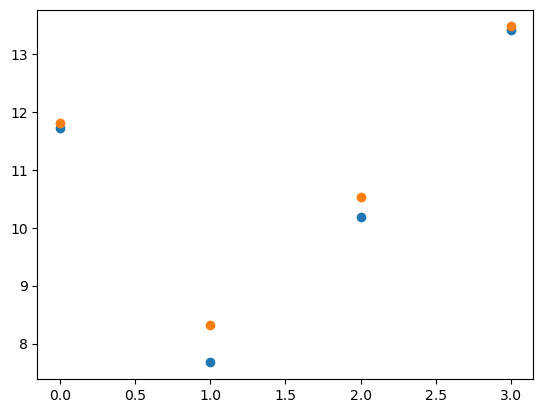

In [24]:
plt.scatter([0,1,2,3], [np.nanmean(winters_mab_gl), np.nanmean(springs_mab_gl), np.nanmean(summers_mab_gl), np.nanmean(autumns_mab_gl)])
plt.scatter([0,1,2,3], [np.nanmean(winters_mab_m6), np.nanmean(springs_mab_m6), np.nanmean(summers_mab_m6), np.nanmean(autumns_mab_m6)])

In [25]:
fig, ax = plt.subplots(
plt.plot(mab_m6.mean(['lat','lon']).groupby('time.month').mean('time').tob)
plt.plot(mab_gl.mean(['latitude','longitude']).groupby('time.month').mean('time'))

SyntaxError: '(' was never closed (2080218672.py, line 1)

In [ ]:
plt.plot(springs_mab_gl - np.nanmean(springs_mab_gl))

# MAB EPU

In [ ]:
annual_anom_mab_gl = mab_gl.mean(['latitude','longitude']).groupby('time.year').mean('time') - mab_gl.mean()
annual_anom_mab_m6 = mab_m6.mean(['lat','lon']).groupby('time.year').mean('time') - mab_m6.mean()

In [ ]:
fig, ax = plt.subplots(figsize = [10, 10])
ax.plot(annual_anom_mab_gl.year, annual_anom_mab_gl.bottomT, color = 'k')
ax.scatter(annual_anom_mab_gl.year, annual_anom_mab_gl.bottomT, color = 'k', label = 'Glorys')
ax.plot(annual_anom_mab_m6.year, annual_anom_mab_m6.tob, color = 'k', linestyle = 'dashed')
ax.scatter(annual_anom_mab_m6.year, annual_anom_mab_m6.tob, color = 'k', marker = 'o', facecolor = 'none', label = 'MOM6')

plt.legend()
plt.title('MAB Annual', fontsize = 14)
plt.ylabel('Temperature Anomaly Deg C', fontsize = 12)

In [ ]:
seasonal_avgs_mab_m6

In [ ]:
seasonal_avgs_mab_m6 = mab_m6.mean(['lat','lon']).resample(time = 'QE-JAN').mean()
seasonal_avgs_mab_gl = mab_gl.mean(['latitude','longitude']).resample(time = 'QE-JAN').mean()

In [ ]:
len(springs_mab_gl)

In [26]:
winters_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(0,109, 4)]
springs_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(1,109, 4)]
summers_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(2,109, 4)]
autumns_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(3,109, 4)]

winters_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(0,115, 4)]
springs_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(1,115, 4)]
summers_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(2,115, 4)]
autumns_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(3,115, 4)]

<>:55: SyntaxWarning: invalid escape sequence '\c'
<>:55: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_29604\2231760303.py:55: SyntaxWarning: invalid escape sequence '\c'
  ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)


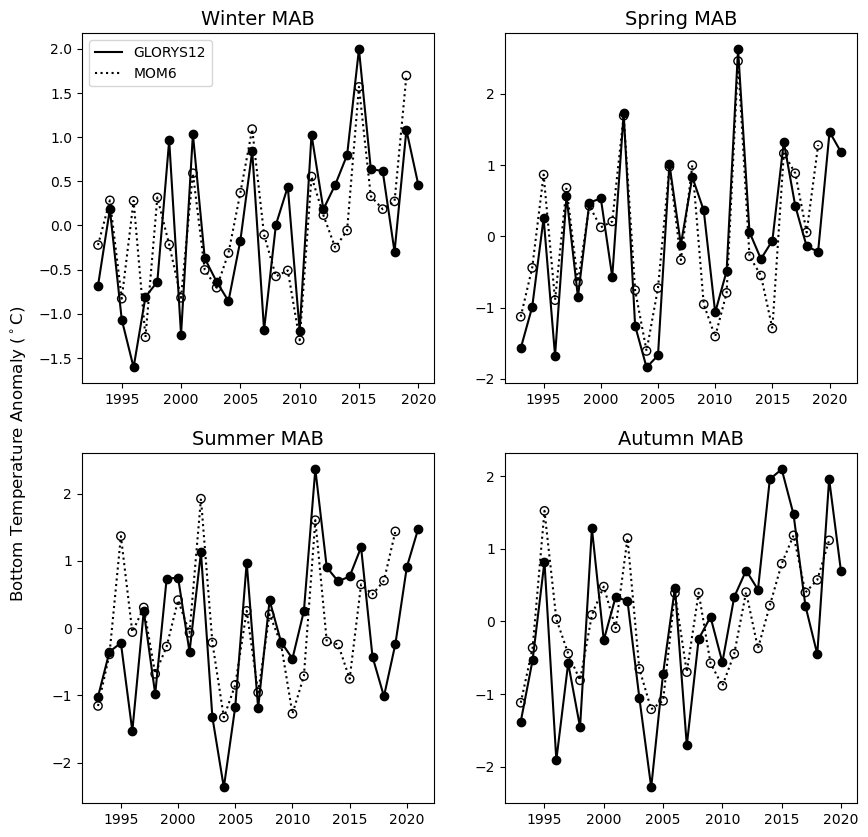

In [27]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1993, 2021), winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:]), c = 'k', label = 'GLORYS12')
ax[0,0].scatter(np.arange(1993, 2021), winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:]), c = 'k')
#x1 = np.arange(1994, 2021)
#y1 = winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:])
#y2 = winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:])

#z1 = np.polyfit(x1, y1, 1)
#z2 = np.polyfit(x1, y2, 1)
#p1 = np.poly1d(z1)
#p2 = np.poly1d(z2)

#add trendline to plot
#ax[0,0].plot(x1, p1(x1), c = 'orange')
#ax[0,0].plot(x1, p2(x1), c = 'orange', linestyle = ':')

ax[0,0].plot(np.arange(1993, 2020), winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:]), c = 'k', linestyle = ':', label = 'MOM6')
ax[0,0].scatter(np.arange(1993, 2020), winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:]),facecolor = 'none', edgecolor = 'k')

ax[0,0].set_title('Winter MAB', fontsize = 14)


ax[0,1].plot(np.arange(1993, 2022), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')
ax[0,1].scatter(np.arange(1993, 2022), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')

ax[0,1].plot(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6),facecolor = 'none', edgecolor = 'k')
#x2 = np.arange(1993, 2020)
#y1a = springs_mab_gl - np.nanmean(springs_mab_gl)
#y2a = springs_mab_m6 - np

ax[0,1].set_title('Spring MAB', fontsize = 14)


ax[1,0].plot(np.arange(1993, 2022), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')
ax[1,0].scatter(np.arange(1993, 2022), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')

ax[1,0].plot(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6),facecolor = 'none', edgecolor = 'k')


ax[1,0].set_title('Summer MAB', fontsize = 14)


ax[1,1].plot(np.arange(1993, 2021), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].scatter(np.arange(1993, 2021), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')

ax[1,1].plot(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6),facecolor = 'none', edgecolor = 'k')

ax[1,1].set_title('Autumn MAB', fontsize = 14)

ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)
ax[0,0].yaxis.set_label_coords(-0.15,-0.2)

In [28]:
forecast_december = xr.open_dataset('C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/tob_forecast/Dec_init/tob_forecast_i201712.nc')
forecast_march = xr.open_dataset('C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/tob_forecast/March_init/tob_forecast_i201803.nc')
forecast_june = xr.open_dataset('C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/tob_forecast/June_init/tob_forecast_i201806.nc')
forecast_september = xr.open_dataset('C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/tob_forecast/Sept_init/tob_forecast_i201809.nc')

forecast_december_mab = reupy.crop_nd(forecast_december, 'lon', 'lat', mab)
forecast_march_mab = reupy.crop_nd(forecast_march, 'lon', 'lat', mab)
forecast_june_mab = reupy.crop_nd(forecast_june, 'lon', 'lat', mab)
forecast_september_mab = reupy.crop_nd(forecast_september, 'lon', 'lat', mab)

In [29]:
forecast_december

<xarray.Dataset>
Dimensions:   (lead: 12, member: 10, lon: 774, lat: 844)
Coordinates:
    init      datetime64[ns] 2017-12-01
  * lead      (lead) int32 0 1 2 3 4 5 6 7 8 9 10 11
  * member    (member) int32 1 2 3 4 5 6 7 8 9 10
    month     int32 12
  * lon       (lon) float64 261.6 261.6 261.7 261.8 ... 323.7 323.8 323.8 323.9
  * lat       (lat) float64 5.273 5.335 5.398 5.461 ... 57.97 58.04 58.1 58.16
Data variables:
    tob       (member, lead, lat, lon) float32 ...
    tob_anom  (member, lead, lat, lon) float32 ...
Attributes:
    NumFilesInSet:    1
    title:            NWA12_forecast_2023-04_1994-12-e01
    grid_type:        regular
    grid_tile:        N/A
    history:          Derived and written at NOAA Physical Science Laboratory
    NCO:              netCDF Operators version 5.1.5 (Homepage = http://nco.s...
    contact:          chia-wei.hsu@noaa.gov
    dataset:          regional mom6 regrid
    paper_reference:  https://doi.org/10.5194/egusphere-2024-394
    data_reference:   https://doi.org/10.5281/zenodo.10642294

In [41]:
winter_forecast_december_mab = forecast_december_mab.sel(lead = slice(1,3))
spring_forecast_december_mab = forecast_december_mab.sel(lead = slice(4,6))
summer_forecast_december_mab = forecast_december_mab.sel(lead = slice(7,9))


spring_forecast_march_mab = forecast_march_mab.sel(lead = slice(1,3))
summer_forecast_march_mab = forecast_march_mab.sel(lead = slice(4,6))
autumn_forecast_march_mab = forecast_march_mab.sel(lead = slice(7,9))

winter_forecast_june_mab = forecast_june_mab.sel(lead = slice(1,3))
autumn_forecast_june_mab = forecast_june_mab.sel(lead = slice(4,6))
summer_forecast_june_mab = forecast_june_mab.sel(lead = slice(7,9))

In [31]:
spr_march = spring_forecast_march_mab.mean(['lat','lon','lead','member'])
sum_march = summer_forecast_march_mab.mean(['lat','lon','lead','member'])
aut_march = autumn_forecast_march_mab.mean(['lat','lon','lead','member'])

In [32]:
seasonal_clim_mab_m6 = np.empty(109)
seasonal_clim_mab_m6[np.arange(0,109,4)] = np.nanmean(winters_mab_m6)
seasonal_clim_mab_m6[np.arange(1,109,4)] = np.nanmean(springs_mab_m6)
seasonal_clim_mab_m6[np.arange(2,109,4)] = np.nanmean(summers_mab_m6)
seasonal_clim_mab_m6[np.arange(3,109,4)] = np.nanmean(autumns_mab_m6)
seasonal_anoms_mab_m6 = seasonal_avgs_mab_m6 - seasonal_clim_mab_m6

In [33]:
seasonal_clim_mab_gl = np.empty(115)
seasonal_clim_mab_gl[np.arange(0,115,4)] = np.nanmean(winters_mab_gl)
seasonal_clim_mab_gl[np.arange(1,115,4)] = np.nanmean(springs_mab_gl)
seasonal_clim_mab_gl[np.arange(2,115,4)] = np.nanmean(summers_mab_gl)
seasonal_clim_mab_gl[np.arange(3,115,4)] = np.nanmean(autumns_mab_gl)
seasonal_anoms_mab_gl = seasonal_avgs_mab_gl - seasonal_clim_mab_gl

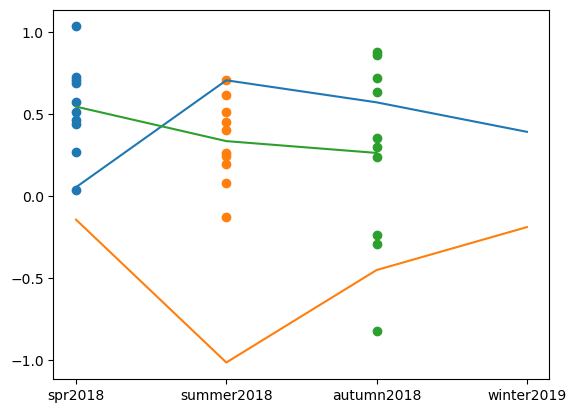

In [34]:
plt.plot(['spr2018','summer2018','autumn2018','winter2019'], seasonal_anoms_mab_m6.tob.sel(time = slice('2018-03','2019-03')))
plt.plot(['spr2018','summer2018','autumn2018','winter2019'], seasonal_anoms_mab_gl.bottomT.sel(time = slice('2018-03','2019-02')))
plt.plot(['spr2018','summer2018','autumn2018'],[spr_march.tob_anom, sum_march.tob_anom,aut_march.tob_anom])
plt.scatter(['spr2018','spr2018','spr2018','spr2018','spr2018','spr2018','spr2018','spr2018','spr2018','spr2018'],spring_forecast_march_mab.mean(['lat','lon','lead']).tob_anom)
plt.scatter(['summer2018','summer2018','summer2018','summer2018','summer2018','summer2018','summer2018','summer2018','summer2018','summer2018'],summer_forecast_march_mab.mean(['lat','lon','lead']).tob_anom)
plt.scatter(['autumn2018','autumn2018','autumn2018','autumn2018','autumn2018','autumn2018','autumn2018','autumn2018','autumn2018','autumn2018'],autumn_forecast_march_mab.mean(['lat','lon','lead']).tob_anom)

In [ ]:
seasonal_anoms_mab_m6.tob.sel(time = slice('2018-03','2019-03'))

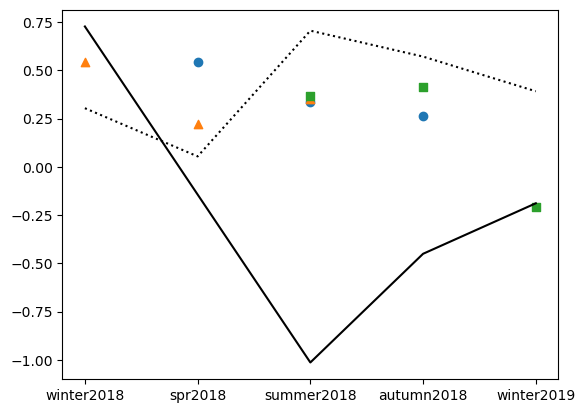

In [43]:
plt.plot(['winter2018','spr2018','summer2018','autumn2018','winter2019'], seasonal_anoms_mab_m6.tob.sel(time = slice('2018-01','2019-03')), color = 'k', linestyle = ':')
plt.plot(['winter2018','spr2018','summer2018','autumn2018','winter2019'], seasonal_anoms_mab_gl.bottomT.sel(time = slice('2018-01','2019-02')), color = 'k')
#plt.plot(['spr2018','summer2018','autumn2018'],[spr_march.tob_anom, sum_march.tob_anom,aut_march.tob_anom])
plt.scatter(['spr2018','summer2018','autumn2018'],[spr_march.tob_anom, sum_march.tob_anom,aut_march.tob_anom],marker = 'o')
plt.scatter(['winter2018','spr2018','summer2018'],[winter_forecast_december_mab.tob_anom.mean(['lat','lon','lead','member']),
                                                           spring_forecast_december_mab.tob_anom.mean(['lat','lon','lead','member']),
                                                           summer_forecast_december_mab.tob_anom.mean(['lat','lon','lead','member'])], marker = '^')
plt.scatter(['summer2018', 'autumn2018','winter2019'],[summer_forecast_june_mab.tob_anom.mean(['lat','lon','lead','member']),
                                                           autumn_forecast_june_mab.tob_anom.mean(['lat','lon','lead','member']),
                                                           winter_forecast_june_mab.tob_anom.mean(['lat','lon','lead','member'])], marker = 's')
                                                                                                                      